# 1 - Importing

## 1.1 - Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 - Importing the data

In [2]:
df_train = pd.read_csv('data/spaceship-titanic/train.csv')
df_test = pd.read_csv('data/spaceship-titanic/test.csv')

In [3]:
# Data preview
print('Train set: {}\nTest set: {}'.format(df_train.shape, df_test.shape))
df_train.head()

Train set: (8693, 14)
Test set: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# 2 - Data Exploration

## 2.1 - Feature Description

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## 2.2 - Looking for missing values

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


There are null values in almost all columns! We must deal with them later.

## 2.3 - Continuous Features

### 2.3.1 - Age

Text(0.5, 0, 'Age')

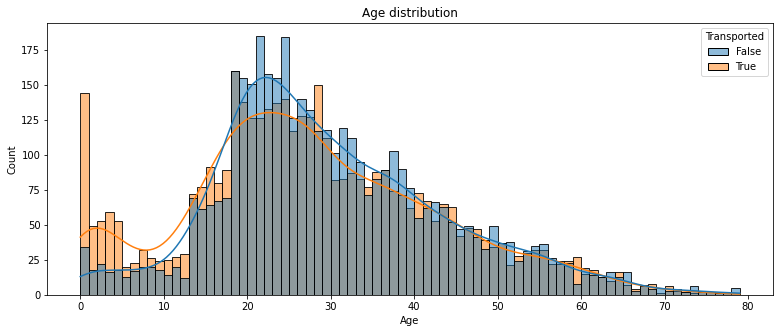

In [6]:
plt.figure(figsize=(13,5))

# Histogram
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Age distribution')
plt.xlabel('Age')

Takeaways:

- People younger than 18 were more likely to have been transported
- People between 18 and 40 were less likely to have been tranported
- Above 40 or so, there's an almost equal probability of being transported   

## 2.4 - Categorical Features

### 2.4.1 - HomePlanet

Text(0.5, 1.0, 'Home Planet')

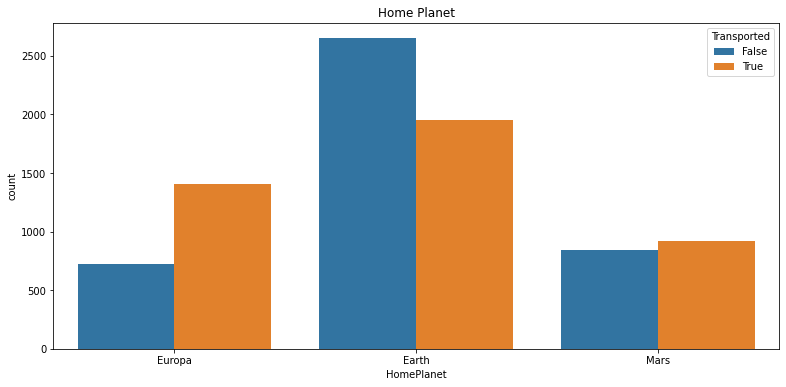

In [7]:
plt.figure(figsize=(13,6))

# Count plot
sns.countplot(data=df_train, x='HomePlanet', hue='Transported')

plt.title('Home Planet')

Takeaways:

- People from Europa were almost 2x as likely to have been transported
- People from Earth are less likely to have been transported
- There's no significant difference in the likelyhood of being transported for people from Mars

### 2.4.2 - CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

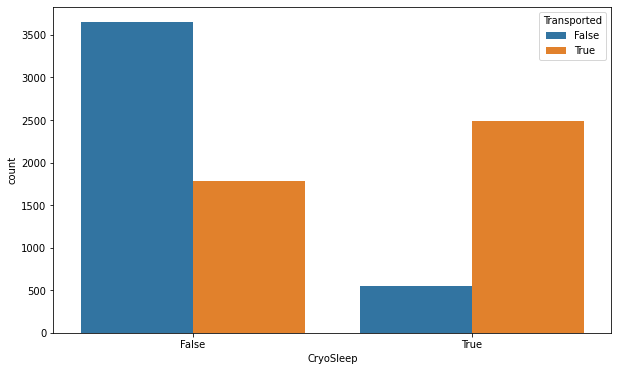

In [8]:
plt.figure(figsize=(10,6))

# Count plot
sns.countplot(data=df_train, x='CryoSleep', hue="Transported")

Takeaways:

- People in cryosleep were far more likely to have been transported

### 2.4.3 - Destination

<AxesSubplot:xlabel='Destination', ylabel='count'>

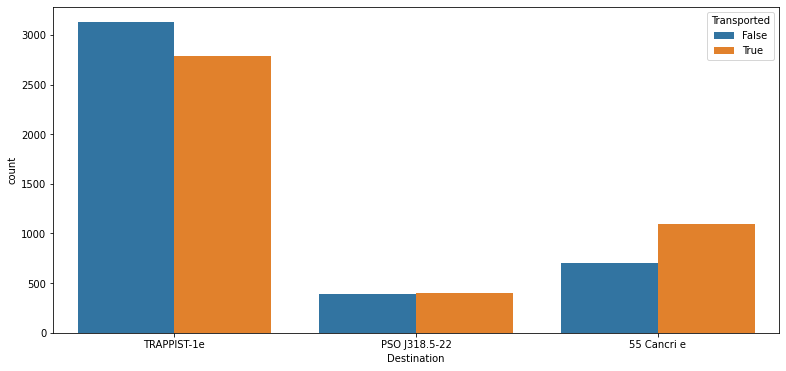

In [9]:
plt.figure(figsize=(13,6))

# Count plot
sns.countplot(data=df_train, x='Destination', hue="Transported")

Takeaways:

- People from TRAPPIST-1e were bit less likely to have been transported
- People from 55 Cancri e were bit more likely to have been transported
- People from PSO J318.5-22 were equally likely to have been transported

### 2.4.4 - VIP

<AxesSubplot:xlabel='VIP', ylabel='count'>

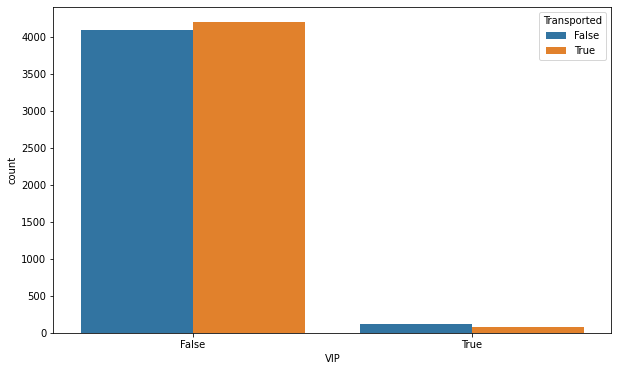

In [10]:
plt.figure(figsize=(10,6))

# Count plot
sns.countplot(data=df_train, x='VIP', hue="Transported")

Takeaways:

- There's no significant difference is a person is VIP or not

Possible actions:

- Remove this column

In [11]:
columns_to_remove = ['VIP']

# 3 - Feature Engineering

## 3.1 - Passenger ID

PassengerId takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

Therefore, let's create two columns based on that: *Group* and *GroupSize* (which is a count of all those within that group) 

In [12]:
# Creating new feature: "Group"
df_train['Group'] = df_train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
df_test['Group'] = df_test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

In [18]:
# Creating new feature: "GroupSize"
df_train['GroupSize'] = df_train['Group'].map(lambda x: pd.concat([df_train['Group'], df_test['Group']]).value_counts()[x])
df_test['GroupSize'] = df_test['Group'].map(lambda x: pd.concat([df_train['Group'], df_test['Group']]).value_counts()[x])

In [21]:
df_train[['PassengerId', 'Group', 'GroupSize']].head(10)

,PassengerId,Group,GroupSize
0,0001_01,1,1
1,0002_01,2,1
2,0003_01,3,2
3,0003_02,3,2
4,0004_01,4,1
5,0005_01,5,1
6,0006_01,6,2
7,0006_02,6,2
8,0007_01,7,1
9,0008_01,8,3


However, something tells me that *Group* will have hundreds or thousands of distinct values, and since it's a categorical feature it might just create more noise. However, let's check:

Text(0.5, 1.0, 'Group')

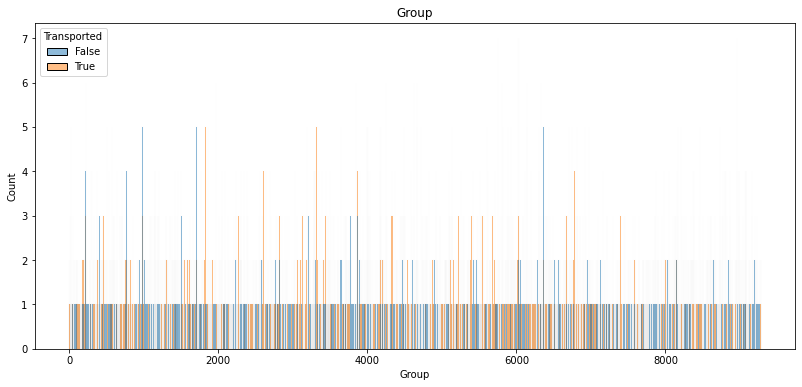

In [50]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

Indeed, it doesn't seem to be a very helpful feature anymore. Let's remove it.

In [52]:
# Adding "PassengerId" and 'Group' to the list of columns to be deleted
columns_to_remove.append(['PassengerId', 'Group'])

## 3.2 - Cabin

The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

We will create 3 new features from that: *Deck*, *CabinNumber* and *CabinSide*

In [22]:
df_train['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [29]:
# Replacing NaN with outliers for now (so the splitting works)
df_train['Cabin'].fillna('Z/9999/Z', inplace=True)
df_test['Cabin'].fillna('Z/9999/Z', inplace=True)

In [30]:
# Creating new feature: "Deck"
df_train['Deck'] = df_train['Cabin'].apply(lambda x: x.split('/')[0])
df_test['Deck'] = df_test['Cabin'].apply(lambda x: x.split('/')[0])

In [32]:
# Creating new feature: "CabinNumber"
df_train['CabinNumber'] = df_train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df_test['CabinNumber'] = df_test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)

In [33]:
# Creating new feature: CabinSide
df_train['CabinSide'] = df_train['Cabin'].apply(lambda x: x.split('/')[2])
df_test['CabinSide'] = df_test['Cabin'].apply(lambda x: x.split('/')[2])

In [34]:
df_train[['Cabin', 'Deck', 'CabinNumber', 'CabinSide']].head()

,Cabin,Deck,CabinNumber,CabinSide
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S


In [36]:
# Now adding "Cabin" to the list of columns to be deleted, since we've already extracted all we needed from it
columns_to_remove.append('Cabin')

In [53]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupSize,Deck,CabinNumber,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S


## 3.3 - Expenditure

5 columns relate to how much each passenger spends money: 

- RoomService
- FoodCourt
- ShoppingMall
- Spa
- VRDeck

It might be interesting to add two new features:

- *SpentMoney*: to differenciate those who spent any money from those who haven't
- *MoneySpent*: counts how much they've spent

In [54]:
expenditure_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [56]:
# Creating new feature: "MoneySpent"
df_train['MoneySpent'] = df_train[expenditure_features].sum(axis=1)
df_test['MoneySpent'] = df_test[expenditure_features].sum(axis=1)

In [62]:
# Creating new feature: "SpentMoney"
df_train['SpentMoney'] = (df_train['MoneySpent'] != 0).astype(int)
df_test['SpentMoney'] = (df_test['MoneySpent'] != 0).astype(int)

In [63]:
df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'MoneySpent', 'SpentMoney']].head(10)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,MoneySpent,SpentMoney
0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,109.0,9.0,25.0,549.0,44.0,736.0,1
2,43.0,3576.0,0.0,6715.0,49.0,10383.0,1
3,0.0,1283.0,371.0,3329.0,193.0,5176.0,1
4,303.0,70.0,151.0,565.0,2.0,1091.0,1
5,0.0,483.0,0.0,291.0,0.0,774.0,1
6,42.0,1539.0,3.0,0.0,0.0,1584.0,1
7,0.0,0.0,0.0,0.0,NaN,0.0,0
8,0.0,785.0,17.0,216.0,0.0,1018.0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0


# 4 - Dealing With Missing Values

## 4.1 - Combining train and test

This is to help find the missing values throughout the entire dataset. They'll be split again later

In [69]:
# Grouping features and labels
X = df_train.drop('Transported', axis=1).copy()
y = df_train['Transported'].copy().astype(int)

# Concatenating both dataframes
df = pd.concat([X, df_test], axis=0).reset_index(drop=True)

In [71]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,GroupSize,Deck,CabinNumber,CabinSide,SpentMoney,MoneySpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,1,B,0,P,0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,1,F,0,S,1,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,2,A,0,S,1,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,2,A,0,S,1,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,1,F,1,S,1,1091.0
